In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('data/FAO.csv', encoding = 'latin-1')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  21477 non-null  object 
 1   Area Code          21477 non-null  int64  
 2   Area               21477 non-null  object 
 3   Item Code          21477 non-null  int64  
 4   Item               21477 non-null  object 
 5   Element Code       21477 non-null  int64  
 6   Element            21477 non-null  object 
 7   Unit               21477 non-null  object 
 8   latitude           21477 non-null  float64
 9   longitude          21477 non-null  float64
 10  Y1961              17938 non-null  float64
 11  Y1962              17938 non-null  float64
 12  Y1963              17938 non-null  float64
 13  Y1964              17938 non-null  float64
 14  Y1965              17938 non-null  float64
 15  Y1966              17938 non-null  float64
 16  Y1967              179

In [3]:
df1 = df1.loc[:, ['Area', 'Unit', 'Element', 'Item', 'Y1993']]
df1

,Area,Unit,Element,Item,Y1993
0,Afghanistan,1000 tonnes,Food,Wheat and products,1840.0
1,Afghanistan,1000 tonnes,Food,Rice (Milled Equivalent),218.0
2,Afghanistan,1000 tonnes,Feed,Barley and products,50.0
3,Afghanistan,1000 tonnes,Food,Barley and products,155.0
4,Afghanistan,1000 tonnes,Feed,Maize and products,141.0
...,...,...,...,...,...
21472,Zimbabwe,1000 tonnes,Food,Milk - Excluding Butter,297.0
21473,Zimbabwe,1000 tonnes,Feed,"Fish, Seafood",0.0
21474,Zimbabwe,1000 tonnes,Food,"Fish, Seafood",33.0
21475,Zimbabwe,1000 tonnes,Food,"Aquatic Products, Other",0.0


In [4]:
df1 = df1[(df1.Area=='Japan') |
         (df1.Area=='United States of America') |
         (df1.Area=='India') |
         (df1.Area=='Norway') |
         (df1.Area=='Senegal')]
df1

,Area,Unit,Element,Item,Y1993
9033,India,1000 tonnes,Feed,Wheat and products,687.0
9034,India,1000 tonnes,Food,Wheat and products,53528.0
9035,India,1000 tonnes,Feed,Rice (Milled Equivalent),1606.0
9036,India,1000 tonnes,Food,Rice (Milled Equivalent),70216.0
9037,India,1000 tonnes,Feed,Barley and products,136.0
...,...,...,...,...,...
20530,United States of America,1000 tonnes,Feed,Milk - Excluding Butter,711.0
20531,United States of America,1000 tonnes,Food,Milk - Excluding Butter,67017.0
20532,United States of America,1000 tonnes,Feed,"Fish, Seafood",1748.0
20533,United States of America,1000 tonnes,Food,"Fish, Seafood",5994.0


In [5]:
df1[(df1.Item == 'Wheat and products') & (df1.Area == 'Japan')]

,Area,Unit,Element,Item,Y1993
10071,Japan,1000 tonnes,Feed,Wheat and products,595.0
10072,Japan,1000 tonnes,Food,Wheat and products,5364.0


In [6]:
df1 = df1[(df1.Element == 'Food')]

In [7]:
df1[(df1.Item == 'Wheat and products') & (df1.Area == 'Japan')]

,Area,Unit,Element,Item,Y1993
10072,Japan,1000 tonnes,Food,Wheat and products,5364.0


In [8]:
people_in_thousands = {'Japan':128542, 'United States of America':309011, 'India':1234281, 'Norway':4885, 'Senegal':12678}

In [9]:
df1['kg/(person*year)']  = df1.apply(lambda row: row.Y1993*1000/people_in_thousands[row.Area], axis = 1)

C:\Users\GRZEGO~1\AppData\Local\Temp/ipykernel_9572/2582705413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['kg/(person*year)']  = df1.apply(lambda row: row.Y1993*1000/people_in_thousands[row.Area], axis = 1)


In [10]:
import numpy as np
np.unique(df1.Item)

array(['Alcoholic Beverages', 'Animal fats', 'Apples and products',
       'Aquatic Animals, Others', 'Aquatic Plants',
       'Aquatic Products, Other', 'Bananas', 'Barley and products',
       'Beans', 'Beer', 'Beverages, Alcoholic', 'Beverages, Fermented',
       'Bovine Meat', 'Butter, Ghee', 'Cassava and products',
       'Cephalopods', 'Cereals - Excluding Beer', 'Cereals, Other',
       'Citrus, Other', 'Cloves', 'Cocoa Beans and products',
       'Coconut Oil', 'Coconuts - Incl Copra', 'Coffee and products',
       'Cottonseed Oil', 'Cream', 'Crustaceans', 'Dates', 'Demersal Fish',
       'Eggs', 'Fats, Animals, Raw', 'Fish, Body Oil', 'Fish, Liver Oil',
       'Fish, Seafood', 'Freshwater Fish', 'Fruits - Excluding Wine',
       'Fruits, Other', 'Grapefruit and products',
       'Grapes and products (excl wine)', 'Groundnut Oil',
       'Groundnuts (Shelled Eq)', 'Honey', 'Infant food',
       'Lemons, Limes and products', 'Maize Germ Oil',
       'Maize and products', 'Marine

C:\Users\Grzegorz Kiersnowski\PycharmProjects\twd1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


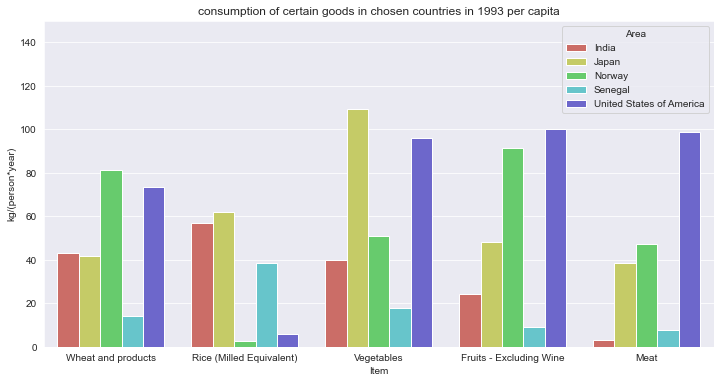

In [11]:
%matplotlib inline
sns.set_style("darkgrid")
#for country in ['Japan', 'United States of America', 'Norway', 'Senegal', 'India']:
dfcountry = df1[((df1.Item == 'Meat')|
                (df1.Item == 'Fruits - Excluding Wine')|
                (df1.Item == 'Vegetables')|
                (df1.Item == 'Wheat and products')|
                (df1.Item == 'Rice (Milled Equivalent)'))]
plt.figure(figsize=(12,6))
ax = sns.barplot(dfcountry['Item'],
            dfcountry['kg/(person*year)'],
            hue = dfcountry['Area'],
            orient = 'v',
            palette = sns.color_palette("hls"))
ax.set(ylim = (0, 150))



plt.title('consumption of certain goods in chosen countries in 1993 per capita')
plt.savefig('./plots/jedzonko_lepsze1993.png')

C:\Users\Grzegorz Kiersnowski\PycharmProjects\twd1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


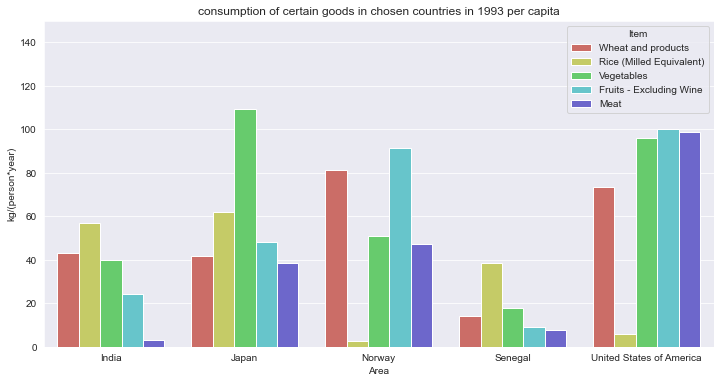

In [12]:
sns.set_style("darkgrid")
#for country in ['Japan', 'United States of America', 'Norway', 'Senegal', 'India']:
dfcountry = df1[((df1.Item == 'Meat')|
                (df1.Item == 'Fruits - Excluding Wine')|
                (df1.Item == 'Vegetables')|
                (df1.Item == 'Wheat and products')|
                (df1.Item == 'Rice (Milled Equivalent)'))]
plt.figure(figsize=(12,6))
ax = sns.barplot(dfcountry['Area'],
            dfcountry['kg/(person*year)'],
            hue = dfcountry['Item'],
            orient = 'v',
            palette = sns.color_palette("hls"))
ax.set(ylim=(0, 150))



plt.title('consumption of certain goods in chosen countries in 1993 per capita')
plt.savefig('./plots/jedzonko1993.png')